In [17]:
import xarray as xr
from fastjmd95 import jmd95numba

import matplotlib.pyplot as plt

In [3]:
ds_surf = xr.open_dataset("gs://cmip6/GFDL_CM2_6/control/surface", engine='zarr', chunks={}, use_cftime=True)

In [4]:
ds_full = xr.open_dataset("gs://cmip6/GFDL_CM2_6/control/ocean_3d", engine='zarr', chunks={}, use_cftime=True)

In [62]:
ds_full 

<xarray.Dataset>
Dimensions:         (nv: 2, time: 1460, st_ocean: 50, yt_ocean: 2700,
                     xt_ocean: 3600, st_edges_ocean: 51, yu_ocean: 2700,
                     xu_ocean: 3600)
Coordinates:
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * time            (time) object 0181-01-03 12:00:00 ... 0200-12-28 12:00:00
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables:
    salt            (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    temp            (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    u               (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    v               (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>

In [66]:
print('Time of data: 1460*5/365 = ' +  str(1460*5/365) )

Time of data: 1460*5/365 = 20.0


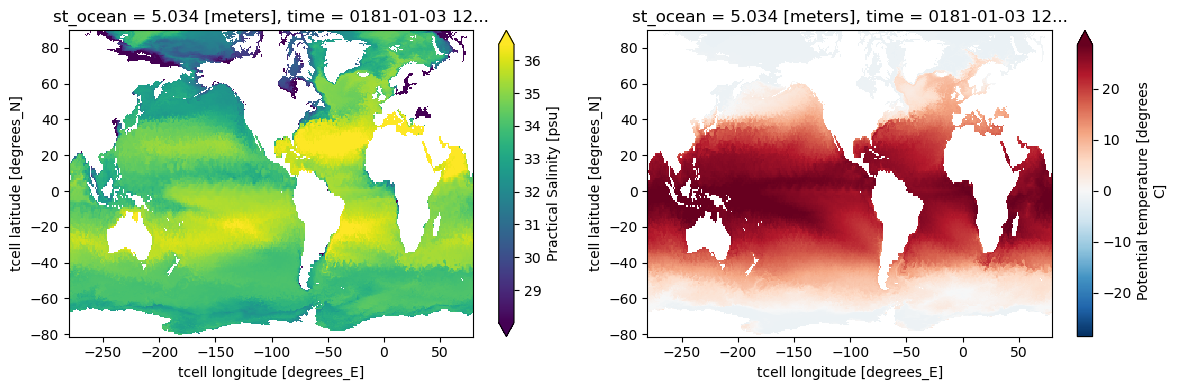

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
ds_full.salt.isel(time=0).sel(st_ocean=0, method='nearest').isel(xt_ocean=slice(0,None, 10), yt_ocean=slice(0,None,10)).plot(robust=True)

plt.subplot(122)
ds_full.temp.isel(time=0).sel(st_ocean=0, method='nearest').isel(xt_ocean=slice(0,None, 10), yt_ocean=slice(0,None,10)).plot(robust=True)

plt.tight_layout()

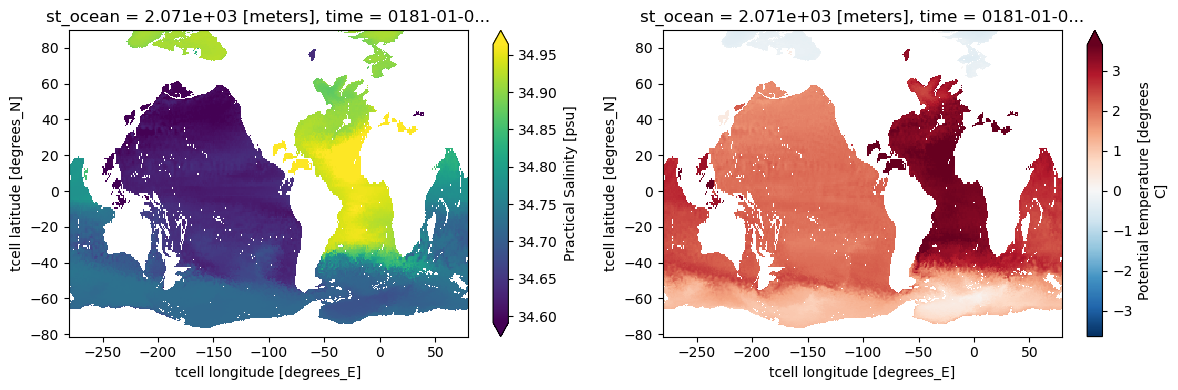

In [16]:
depth = 2000
plt.figure(figsize=(12, 4))

plt.subplot(121)
ds_full.salt.isel(time=0).sel(st_ocean=depth, method='nearest').isel(xt_ocean=slice(0,None, 10), yt_ocean=slice(0,None,10)).plot(robust=True)

plt.subplot(122)
ds_full.temp.isel(time=0).sel(st_ocean=depth, method='nearest').isel(xt_ocean=slice(0,None, 10), yt_ocean=slice(0,None,10)).plot(robust=True)

plt.tight_layout()

In [49]:
sigma_0 = xr.apply_ufunc(
    jmd95numba.rho, ds_full.salt, ds_full.temp, 0, dask='parallelized', output_dtypes=[ds_full.salt.dtype]
) - 1000

In [56]:
rho_insitu = xr.apply_ufunc(
    jmd95numba.rho, ds_full.salt, ds_full.temp, ds_full.st_ocean, dask='parallelized', output_dtypes=[ds_full.salt.dtype]
) - 1000

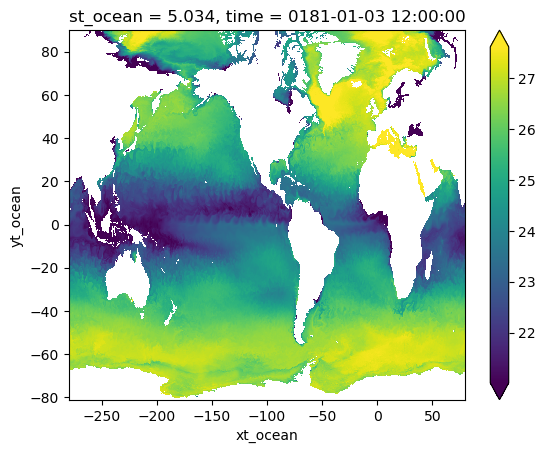

In [51]:
sigma_0.isel(time=0, st_ocean=0).plot(robust=True)

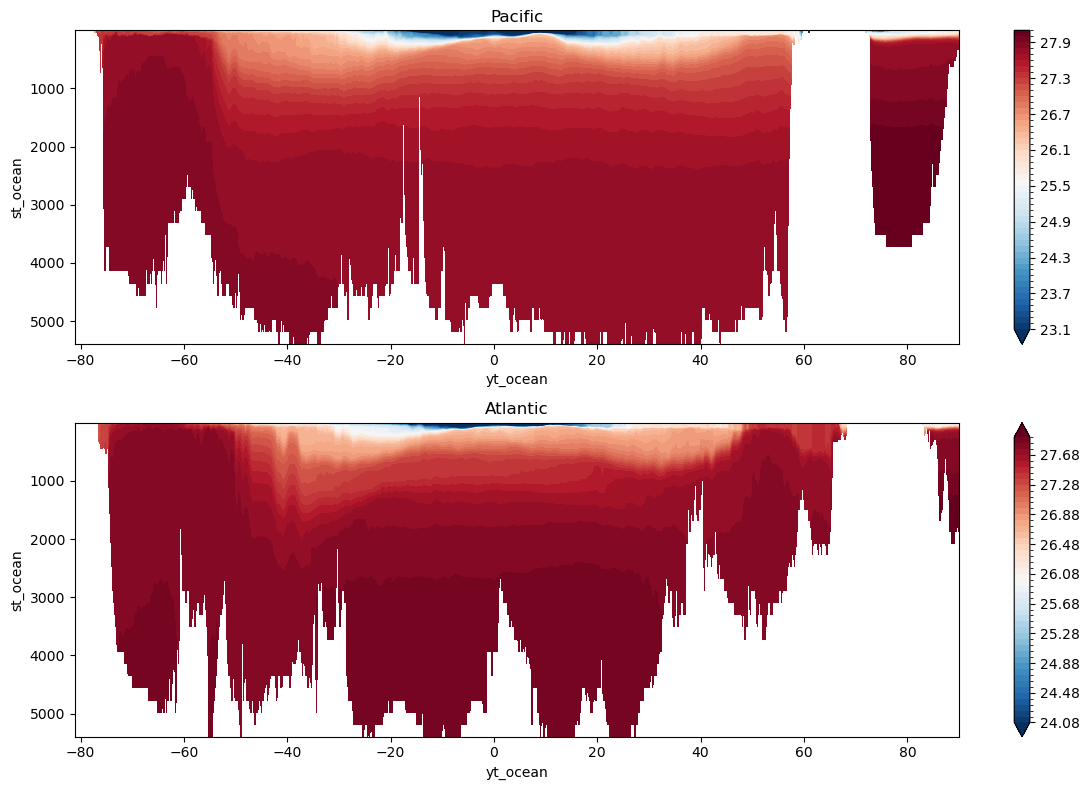

In [55]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
sigma_0.isel(time=0).sel(xt_ocean=-150, method='nearest').plot.contourf(robust=True, levels=51, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('Pacific')

plt.subplot(212)
sigma_0.isel(time=0).sel(xt_ocean=-30, method='nearest').plot.contourf(robust=True, levels=51, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('Atlantic')

plt.tight_layout()

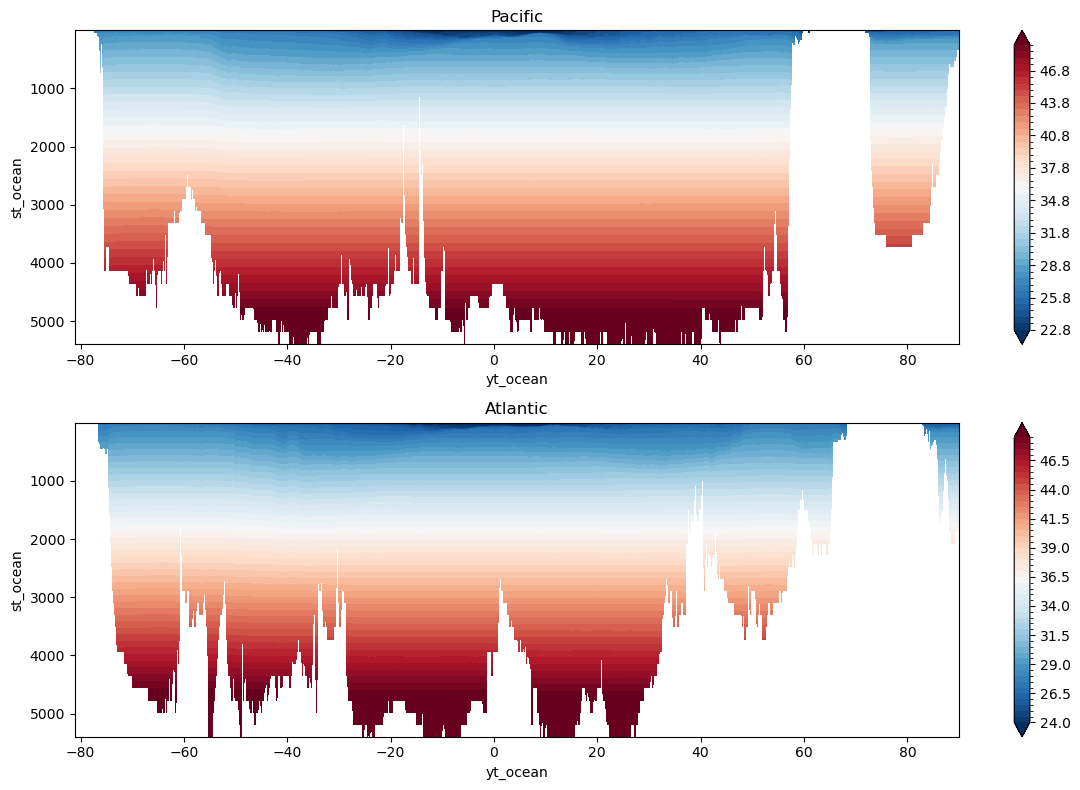

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
rho_insitu.isel(time=0).sel(xt_ocean=-150, method='nearest').plot.contourf(robust=True, levels=51, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('Pacific')

plt.subplot(212)
rho_insitu.isel(time=0).sel(xt_ocean=-30, method='nearest').plot.contourf(robust=True, levels=51, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('Atlantic')

plt.tight_layout()

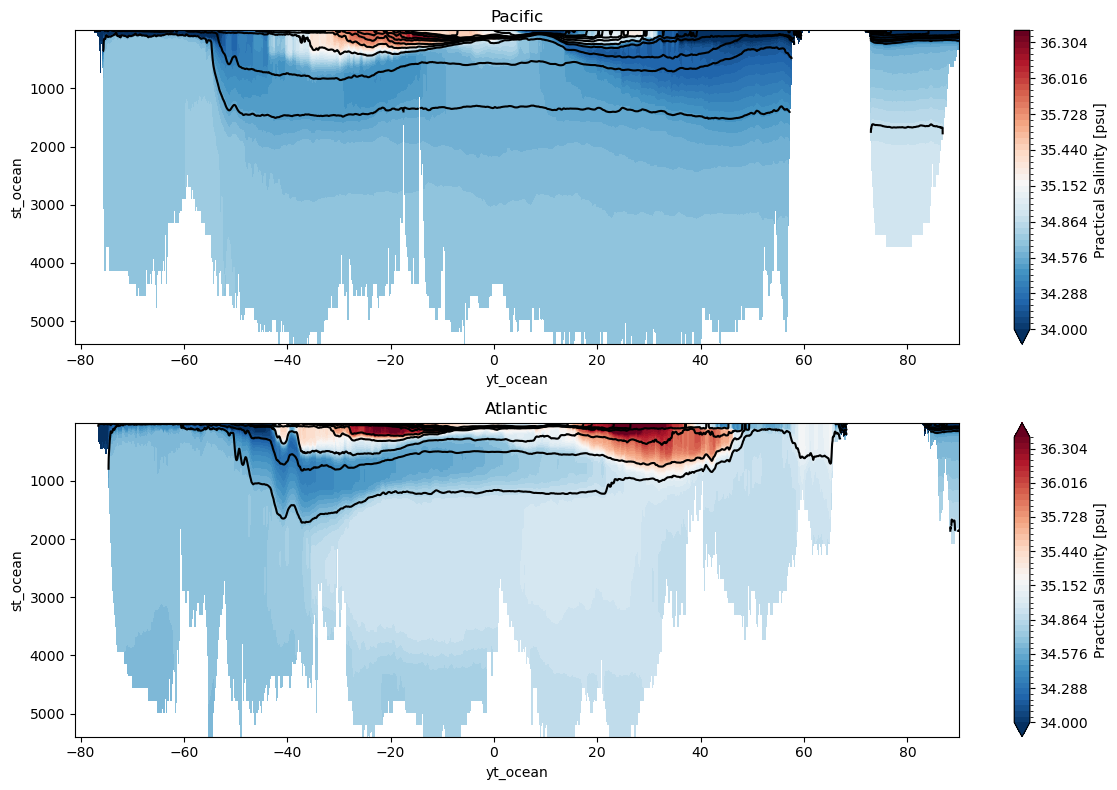

In [61]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
ds_full.salt.isel(time=0).sel(xt_ocean=-150, method='nearest').plot.contourf(robust=True, levels=51, vmin=34, vmax=36.4,  cmap='RdBu_r')
sigma_0.isel(time=0).sel(xt_ocean=-150, method='nearest').plot.contour(robust=True, levels=11, colors='k')
plt.gca().invert_yaxis()
plt.title('Pacific')

plt.subplot(212)
ds_full.salt.isel(time=0).sel(xt_ocean=-30, method='nearest').plot.contourf(robust=True, levels=51, vmin=34, vmax=36.4,  cmap='RdBu_r')
sigma_0.isel(time=0).sel(xt_ocean=-30, method='nearest').plot.contour(robust=True, levels=11, colors='k')
plt.gca().invert_yaxis()
plt.title('Atlantic')

plt.tight_layout()